In [39]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


## Percentile

In [33]:
df = pd.read_csv('C:/Users/XXXX/Documents/IP/FE/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [34]:
min_threshhold,max_threshhold=df.price_per_sqft.quantile([0.001,0.999])
min_threshhold,max_threshhold

(1366.184, 50959.36200000098)

In [35]:
min_threshhold

1366.184

In [36]:
max_threshhold

50959.36200000098

In [22]:
df[df.price_per_sqft < min_threshhold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [23]:
df[df.price_per_sqft > max_threshhold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [24]:
df2=df[(df.price_per_sqft < max_threshhold) & (df.price_per_sqft > min_threshhold)]
df2.shape

(13172, 7)

## Z-Score

In [52]:
df1 = pd.read_csv('C:/Users/XXXX/Documents/IP/FE/heights.csv')


In [53]:
df1.sample(5)

,gender,height
5813,Female,67.518399
8852,Female,64.123065
3053,Male,69.777875
7535,Female,65.567375
840,Male,69.016067


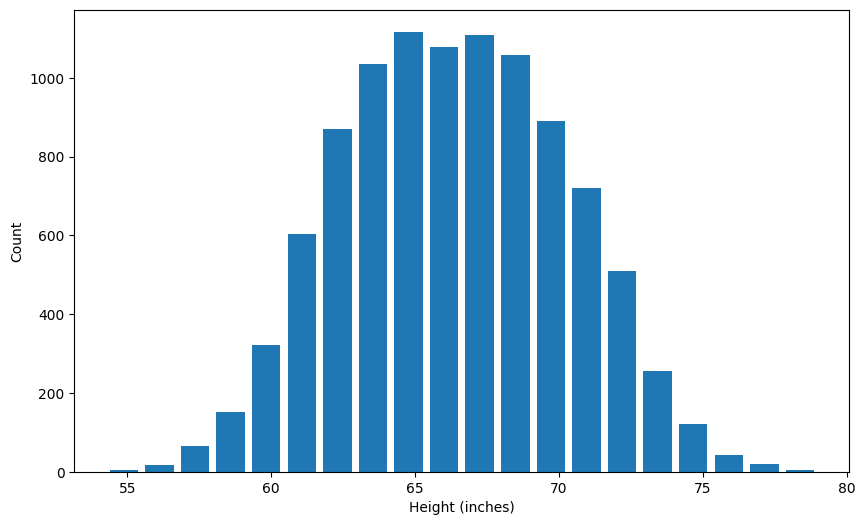

In [54]:
plt.hist(df1.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

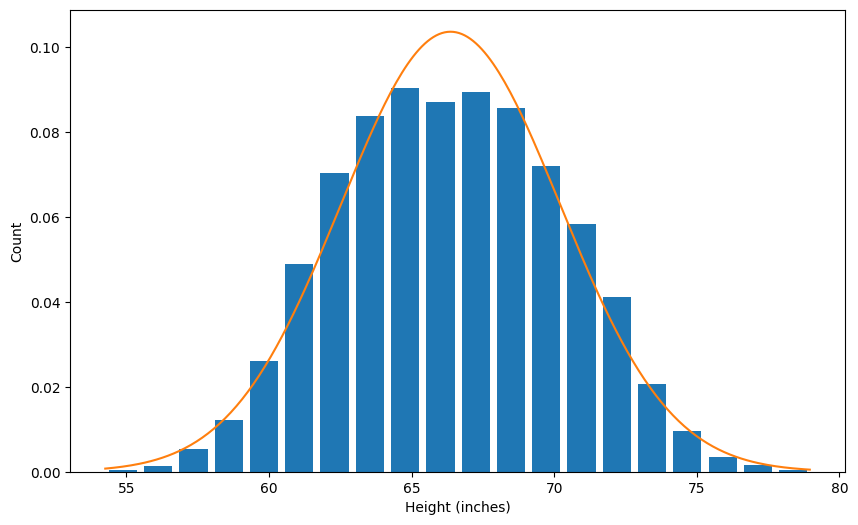

In [55]:
from scipy.stats import norm
import numpy as np
plt.hist(df1.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df1.height.min(), df1.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df1.height.mean(),df1.height.std()))

In [56]:
df1.height.mean()

np.float64(66.367559754866)

In [57]:
df1.height.std()

np.float64(3.847528120795573)

In [59]:
#Upper Level
upper=df1.height.mean()+3*df1.height.std()

In [60]:
lower=df1.height.mean()-3*df1.height.std()

In [62]:
df1[(df1.height>upper)|(df1.height<lower)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [65]:
df_clean=df1[(df1.height<upper) & (df1.height>lower)]
df_clean.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


## Interquatile Range